In [1]:
import matplotlib.pyplot as plt
import numpy as np
import chromo
from particle import Particle

In [2]:
event_kin = chromo.kinematics.FixedTarget(1e8, 2212, 2212)
event_generator = chromo.models.Sibyll23d(event_kin)

 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
 | last modifications: F. Riehn (05/20/2020)        |

 SIG_AIR_INI: initializing target: (i,A)           1           0 air..
 SIG_AIR_INI: initializing target: (i,A)           2          14 nit..
 SIG_AIR_INI: initializing target: (i,A)           3          16 oxy..


In [3]:
def get_cross_section(proj_pdg, target):
    def total_cs(energy):
        event_kin = chromo.kinematics.FixedTarget(energy, proj_pdg, target)
        try:
            return np.float64(event_generator.cross_section(event_kin).total)
        except:
            return np.float64(np.nan)
    return total_cs 

In [8]:
sibyll_cs_channel = [2112, 211, 321]
energy_array = np.geomspace(1e0, 1e10, 1000, dtype='float64')
sigma_tab = np.empty([len(sibyll_cs_channel), len(energy_array)], dtype=np.float64)

In [9]:
for i, pdg in enumerate(sibyll_cs_channel):
    sigma_tab[i, :] = np.frompyfunc(get_cross_section(pdg, 2212), 1, 1)(energy_array).astype("float64")

[         nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          

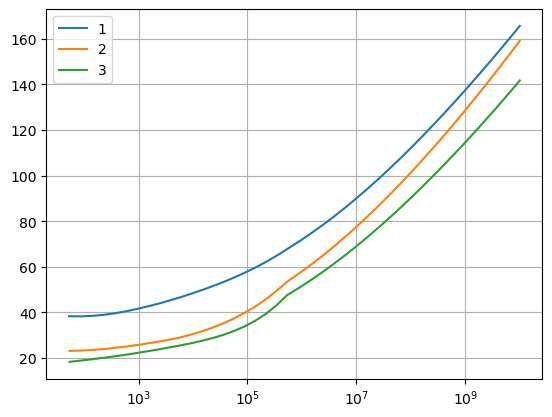

In [10]:
plt.semilogx(energy_array, sigma_tab[0, :], label="1")
plt.semilogx(energy_array, sigma_tab[1, :], label="2")
plt.semilogx(energy_array, sigma_tab[2, :], label="3")
plt.grid()
plt.legend()

print(sigma_tab[0, :])